<H1>DRAW SWARM ANALYSIS</H1>

In [1]:
import pandas as pd
import numpy as np
import json
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 120)
SMALL_SIZE = 8
MEDIUM_SIZE = 10
#BIGGER_SIZE = 24
def graphic():
    BIGGER_SIZE = 16
    #Font sizes modifiers for inclusion in papers. 
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title
def graph():
    BIGGER_SIZE = 24
    #Font sizes modifiers for inclusion in papers. 
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title



<h2>LOAD DATA</h2>

In [2]:
with open ("./data/csv/json.txt", "r") as jsonfilename:
    name = jsonfilename.readlines()
with open("./data/json/%s"%(name[0])) as json_file:
    data = json.load(json_file)
jsonrb = data['params']['rb']
jsonkr = data['params']['kr']
jsonkc = data['params']['kc']
jsonkg = data['params']['kg']
jsonrgf = data['params']['rgf']
jsoncb = data['params']['cb']
jsonA = data['params']['A']
jsonT = data['params']['T']
jsonspeed = data['params']['speed']
S=pd.read_csv('./data/csv/exp.p.csv')
C=pd.read_csv('./data/csv/exp.c.csv')
R=pd.read_csv('./data/csv/exp.r.csv')

<h2>EXTRACT STEP</h2>


In [3]:
#######################
# MAGNITUDE METRIC DATA
#######################
# GET EVERY COHESION/REPULSION INTERACTION
METRICC=C[["STEP","PID","NID","MAG"]]
METRICR=R[["STEP","PID","NID","MAG"]]
# MERGE COHESION AND REPULSION INTO ONE DATAFRAME
METRICRES=pd.merge(METRICC,METRICR,how='left',on=["STEP","PID","NID"],suffixes=("_C","_R")).fillna(0)
# CALCULATE RESULTANT MAGNITUDE FOR EACH RELATIONSHIP (+/- CATERED FOR WITH THIS)
METRICRES["RES"] = METRICRES["MAG_C"] - METRICRES["MAG_R"]
# AGGREGATE THE RESULT BY STEP
METRICMEAN=METRICRES[['STEP','RES']].groupby('STEP',as_index=False).agg(['sum'])
METRICMEAN.columns = METRICMEAN.columns.droplevel(0)
METRICMEAN=METRICMEAN.reset_index()
# COUNT THE NUMBER OF COHESION AND REPULSION RELATIONSHIPS
METRICCC=METRICC[['STEP']].groupby('STEP').size().reset_index(name='CCOUNT')
METRICRC=METRICR[['STEP']].groupby('STEP').size().reset_index(name='RCOUNT')
# MERGE THE COUNTS WITH THE MEAN
METRICMEAN=pd.merge(METRICMEAN,METRICCC,how='left',on=["STEP"]).fillna(0)
METRICMEAN=pd.merge(METRICMEAN,METRICRC,how='left',on=["STEP"]).fillna(0)
# CALCULATE MEAN
METRICMEAN["MEAN"] = METRICMEAN["sum"] / (METRICMEAN["CCOUNT"] + METRICMEAN["RCOUNT"])
# MERGE MEAN INTO RES 
METRICRES=pd.merge(METRICRES,METRICMEAN,how="left",on=["STEP"]).fillna(0)
METRICRES=METRICRES[["STEP","RES","MEAN"]]
# CALCULATE DIFF2
METRICRES["DIFF2"] = np.square(METRICRES["RES"] - METRICRES["MEAN"]) 
METRICRES=METRICRES[["STEP","DIFF2"]]
# AGGREGATE
METRICRES=METRICRES[['STEP','DIFF2']].groupby('STEP',as_index=False).agg(['sum'])
METRICRES.columns = METRICRES.columns.droplevel(0)
METRICRES=METRICRES.reset_index()
# MERGE COHESION AND REPULSION INTO DATAFRAME
METRICRES=pd.merge(METRICRES,METRICCC,how='left',on=["STEP"]).fillna(0)
METRICRES=pd.merge(METRICRES,METRICRC,how='left',on=["STEP"]).fillna(0)
# CALCULATE NUMBER OF INTERACTIONS
METRICRES["N"] = (METRICRES["CCOUNT"] + METRICRES["RCOUNT"])
# CALCULATE STD
METRICRES["STD"] = np.sqrt(METRICRES["sum"] / METRICRES["N"])
# CREATE METRIC DATAFRAME WITH MEAN AND STD
METRIC=pd.merge(METRICRES[["STEP","STD"]],METRICMEAN[["STEP","MEAN"]],how="left",on=["STEP"])

Set <code>step</code> for position in simulation<br>
Set <code>id</code> for individual agent of interest.

In [4]:
#############
# INDIVIDUAL AGENT DATA
#############
step=50
id=100

COHESION=C[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM","MAG","DIST"]].query("STEP==%d" % step)
COHESIONP=COHESION[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM","MAG","DIST"]].query("PPERIM==True and NPERIM==True")
COHESIONPI=COHESION[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM","MAG","DIST"]].query("PPERIM==True and NPERIM==False")
COHESIONIP=COHESION[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM","MAG","DIST"]].query("PPERIM==False and NPERIM==True")
COHESIONII=COHESION[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM","MAG","DIST"]].query("PPERIM==False and NPERIM==False")
REPULSION=R[["STEP","PID","PX","PY","NID","NX","NY","MAG"]].query("STEP==%d" % step)

AGENTS=S[["STEP","ID","X","Y","PERIM","IMAG"]].query("STEP==%d" % step)
CENTROIDX=AGENTS["X"].mean()
CENTROIDY=AGENTS["Y"].mean()
#AGENTS["DISTANCE"]=np.sqrt((S["X"]-CENTROIDX)**2 + (S["Y"]-CENTROIDY)**2)

PAGENTS=AGENTS.query("PERIM == True")
PCENTROIDX=PAGENTS["X"].mean()
PCENTROIDY=PAGENTS["Y"].mean()

AGENTS["DISTANCETOP"]=np.sqrt((AGENTS["X"]-CENTROIDX)**2 + (AGENTS["Y"]-CENTROIDY)**2)
AGENTS["DISTANCEPTOP"]=np.sqrt((AGENTS["X"]-PCENTROIDX)**2 + (AGENTS["Y"]-PCENTROIDY)**2)

PAGENTS=AGENTS.query("PERIM == True")

CENTROIDTOPERIM=PAGENTS["DISTANCETOP"].mean()
PCENTROIDTOPERIM=PAGENTS["DISTANCEPTOP"].mean()

NAGENTS=AGENTS.query("PERIM == False")
AGENT=AGENTS.query("ID==%d" % id)
ACOHESION=COHESION.query("PID==%d" % id)
ACOHESIONP=ACOHESION.query("PPERIM==True and NPERIM==True")
AREPULSION=REPULSION.query("PID==%d" % id)
# NEIGHBOURS LINK DATA
NEIGHBOURS=ACOHESION["NID"]
# NEIGHBOUR LINKS FOR STEP EXCLUDING THE TARGET AGENT 
STEPCOH=COHESION.query("STEP==%d and PID!=%d and NID!=%d" % (step,id,id))
# FILTER NEIGHBOUR STARTING POINTS USING A LIST
STARTCOH=STEPCOH[STEPCOH['PID'].isin(NEIGHBOURS)]
# FILTER NEIGHBOUR END POINTS USING A LIST
NEIGHBOURCOH=STARTCOH[STARTCOH['NID'].isin(NEIGHBOURS)]

<h2>SWARM GRAPH</h2><br>
FULL SWARM GRAPH

In [5]:
%matplotlib qt
graphic()
ax = plt.gca()
ax.cla() # clear things for fresh plot
circle1 = plt.Circle((CENTROIDX, CENTROIDY), CENTROIDTOPERIM, color='b', fill=False)
circle2 = plt.Circle((PCENTROIDX, PCENTROIDY), PCENTROIDTOPERIM, color='g', fill=False)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.scatter(NAGENTS["X"],NAGENTS["Y"],s=30,color="black",zorder=2)
ax.scatter(PAGENTS["X"],PAGENTS["Y"],s=30,color="red",zorder=2)
for i,row in AGENTS.iterrows():
    ax.annotate("%5d"%row["ID"],(row["X"],row["Y"]), fontsize=SMALL_SIZE)
#for i,row in COHESION.iterrows():
#    ax.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="grey",zorder=1)
#for i,row in COHESIONP.iterrows():
#    ax.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="brown",zorder=1)
plt.title('%s\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s\nSwarm at STEP:[%s]'%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf,step))
plt.grid()
plt.gca().set_aspect("equal")
#plt.xlim(-20,20)
#plt.ylim(-20,20)
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
#plt.show()

MODEL GRAPH

In [6]:
%matplotlib qt
no_bins = 40
plt.style.use('classic')
plt.title('%s\nRelationship Distances ($|bb\'|$)\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s\nSwarm at STEP:[%s]'%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf,step))

y1,binEdges1=np.histogram(COHESIONII['DIST'],bins=no_bins)
y2,binEdges2=np.histogram(COHESIONIP['DIST'],bins=no_bins)
y3,binEdges3=np.histogram(COHESIONP['DIST'],bins=no_bins)
y4,binEdges4=np.histogram(COHESIONPI['DIST'],bins=no_bins)

bincenters1 = 0.5*(binEdges1[1:]+binEdges1[:-1])
bincenters2 = 0.5*(binEdges2[1:]+binEdges2[:-1])
bincenters3 = 0.5*(binEdges3[1:]+binEdges3[:-1])
bincenters4 = 0.5*(binEdges4[1:]+binEdges4[:-1])

plt.plot(bincenters1,y1,'k-', linewidth=2, markersize=12, label='II')
plt.plot(bincenters2,y2,'g-', linewidth=2, markersize=12, label='IP')
plt.plot(bincenters3,y3,'r-', linewidth=2, markersize=12, label='PP')
plt.plot(bincenters4,y4,'b-', linewidth=2, markersize=12, label='PI')

plt.fill_between(bincenters1,y1, alpha=0.1, color='k')
plt.fill_between(bincenters2,y2, alpha=0.1, color='g')
plt.fill_between(bincenters3,y3, alpha=0.1, color='r')
plt.fill_between(bincenters4,y4, alpha=0.1, color='b')

plt.legend()
plt.grid()

plt.hist(COHESIONII['DIST'], bins = 250, alpha=0.5, edgecolor="black", linewidth=1, label="II")
plt.hist(COHESIONIP['DIST'], bins = 250, alpha=0.5, edgecolor="black", linewidth=1, label="IP")
plt.hist(COHESIONPI['DIST'], bins = 250, alpha=0.5, edgecolor="black", linewidth=1, label="PI")
plt.hist(COHESIONP['DIST'], bins = 250, alpha=0.5, edgecolor="black", linewidth=1, label="PP")

plt.ylabel("Count")
plt.xlabel("Distance (UNITS) (Bins=%s)"%(no_bins))
plt.legend()
plt.show()

In [7]:
%matplotlib qt
no_bins = 40
plt.style.use('classic')
plt.title('%s\nRelationship Distances ($|bb\'|$)\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s\nSwarm at STEP:[%s]'%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf,step))

plt.hist([COHESIONII['DIST'],COHESIONIP['DIST'],COHESIONPI['DIST'],COHESIONP['DIST']],bins=no_bins,cumulative=True,label=['II','IP','PI','PP'])

#y1,binEdges1=np.histogram(COHESIONII['DIST'],bins=no_bins,cumulative=True)
#y2,binEdges2=np.histogram(COHESIONIPPI['DIST'],bins=no_bins,cumulative=True)
#y3,binEdges3=np.histogram(COHESIONP['DIST'],bins=no_bins,cumulative=True)

#bincenters1 = 0.5*(binEdges1[1:]+binEdges1[:-1])
#bincenters2 = 0.5*(binEdges2[1:]+binEdges2[:-1])
#bincenters3 = 0.5*(binEdges3[1:]+binEdges3[:-1])

#plt.plot(bincenters1,y1,'k-', linewidth=2, markersize=12, label='II')
#plt.plot(bincenters2,y2,'g-', linewidth=2, markersize=12, label='IPPI')
#plt.plot(bincenters3,y3,'r-', linewidth=2, markersize=12, label='PP')

#plt.fill_between(bincenters1,y1, alpha=0.1, color='k')
#plt.fill_between(bincenters2,y2, alpha=0.1, color='g')
#plt.fill_between(bincenters3,y3, alpha=0.1, color='r')

plt.legend(loc='center left')
plt.grid()

#plt.hist(COHESIONII['DIST'], bins = 250, alpha=0.5, edgecolor="black", linewidth=1, label="II")
#plt.hist(COHESIONIPPI['DIST'], bins = 250, alpha=0.5, edgecolor="black", linewidth=1, label="IPPI")
#plt.hist(COHESIONP['DIST'], bins = 250, alpha=0.5, edgecolor="black", linewidth=1, label="PP")

plt.ylabel("Count")
plt.xlabel("Distance (UNITS) (Bins=%s)"%(no_bins))
plt.show()

In [8]:
plt.hist([COHESIONII['DIST'],COHESIONPI['DIST'],COHESIONIP['DIST'],COHESIONP['DIST']], bins=250, histtype='step', label=['II','PI','IP','PP'])
##sb.histplot(COHESIONIPPI['DIST'], label='IPPI')
#sb.histplot(COHESIONP['DIST'], label='PP')
plt.title('%s\nRelationship Distances ($|bb\'|$)\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s\nSwarm at STEP:[%s]'%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf,step))
plt.legend()
plt.grid()
plt.show()

In [9]:
%matplotlib qt
graphic()
#plt.style.use('classic')
plt.title('%s\nRelationship Intermediate Magnitude\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s\nSwarm at STEP:[%s]'%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf,step))
plt.hist(AGENTS['IMAG'], bins = 25)
plt.ylabel("Count (25 Bins)")
plt.xlabel("IMAG $|v_c(b) - v_r(b)|$")
#plt.hist(COHESIONIPPI['MAG'], bins = 50, alpha=0.5, label="IPPI")
#plt.hist(COHESIONP['MAG'], bins = 50, alpha=0.5, label="PP")
#plt.legend()
plt.show()

REPULSION GRAPH

In [10]:
%matplotlib qt
for i,row in REPULSION.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],"r-")
plt.scatter(AGENTS["X"],AGENTS["Y"],s=100)
plt.title("Swarm Repulsion at STEP:[%d]" % step)
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()

<H3>INDIVIDUAL AGENT GRAPHS</H3><br>
AGENT AND NEIGHBOURS

In [11]:
%matplotlib qt
plt.scatter(AGENT["X"],AGENT["Y"],s=100,color="green")
plt.scatter(ACOHESION["NX"],ACOHESION["NY"],s=100,color="green")
for i,row in ACOHESION.iterrows():
    plt.annotate("%5d"%row["PID"],(row["PX"],row["PY"]))
for i,row in ACOHESION.iterrows():
    plt.annotate("%5d"%row["NID"],(row["NX"],row["NY"]))
for i,row in ACOHESION.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="lightgreen")
for i,row in ACOHESIONP.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="darkgreen")

plt.title("Single Agent [%d] Swarm Cohesion at STEP:[%d]" % (id,step))
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

AGENT AND NEIGHBOURS WITH NEIGHBOUR LINKS SHOWN

In [12]:
%matplotlib qt
graphic()
plt.scatter(AGENT["X"],AGENT["Y"],s=100,color="green")
plt.scatter(ACOHESION["NX"],ACOHESION["NY"],s=100,color="green")
for i,row in NEIGHBOURCOH.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="black")
for i,row in ACOHESION.iterrows():
    plt.annotate("%5d"%row["PID"],(row["PX"],row["PY"]))
for i,row in ACOHESION.iterrows():
    plt.annotate("%5d"%row["NID"],(row["NX"],row["NY"]))
for i,row in ACOHESION.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="lightgreen")
for i,row in ACOHESIONP.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="darkgreen")

plt.title("Single Agent [%d] Swarm Cohesion at STEP:[%d]" % (id,step))
plt.suptitle("Showing neighbour links")
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

<H3>FULL SWARM GRAPHS</H3>

<H3>MAGNITUDE ANALYSIS</H3>

In [13]:
METRIC

,STEP,STD,MEAN
0,1,16.565068,2.114399
1,2,16.345384,2.154252
2,3,16.096505,2.157311
3,4,16.112537,1.964546
4,5,15.653337,2.048311
...,...,...,...
373,374,11.567783,1.092457
374,375,11.568529,1.101143
375,376,11.572756,1.089467
376,377,11.560885,1.099161


In [14]:
#METRIC CALCULATIONS
#mean = S[["STEP","IMAG"]].groupby('STEP').mean().reset_index()
#mean = METRIC[["STEP","RES"]].groupby('STEP').mean().reset_index()
#std = METRIC[["STEP","RES"]].groupby('STEP').std().reset_index()
#std = S[["STEP","IMAG"]].groupby('STEP').std().reset_index()


In [14]:
%matplotlib qt
graphic()
plt.plot(METRIC.STEP,METRIC.MEAN,label=("MEAN"))
plt.plot(METRIC.STEP,METRIC.STD,label=("STD"))
plt.title("Inter-agent Aggregated Magnitude")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude ($\mu_p(S)$,$\sigma_p(S)$)")
plt.show()

In [15]:
%matplotlib qt
graphic()
plt.errorbar(METRIC.STEP,METRIC.MEAN,METRIC.STD,label='Cohesion magnitude',ecolor='red',color='black')
#plt.title("Inter-agent Aggregated Magnitude")
plt.title("Inter-agent Aggregated Magnitude\n%s\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s"%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf))
plt.legend()
plt.grid()
plt.xlabel("Time Step")
plt.ylabel("Magnitude $\psi_p(S)$")
plt.tight_layout()
plt.show()

<H3>DISTANCE ANALYSIS</H3>

In [16]:
CPP=C[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM","MAG","DIST"]].query("PPERIM==True and NPERIM==True")
CIP=C[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM","MAG","DIST"]].query("(PPERIM==False and NPERIM==True)")
CPI=C[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM","MAG","DIST"]].query("(PPERIM==True and NPERIM==False)")
CII=C[["STEP","PID","PX","PY","NID","NX","NY","PPERIM","NPERIM","MAG","DIST"]].query("PPERIM==False and NPERIM==False")


PPMEAN = CPP[["STEP","DIST"]].groupby('STEP').mean().reset_index()
PIMEAN = CPI[["STEP","DIST"]].groupby('STEP').mean().reset_index()
IPMEAN = CIP[["STEP","DIST"]].groupby('STEP').mean().reset_index()
IIMEAN = CII[["STEP","DIST"]].groupby('STEP').mean().reset_index()

PPSTD = CPP[["STEP","DIST"]].groupby('STEP').std().reset_index()
IPSTD = CIP[["STEP","DIST"]].groupby('STEP').std().reset_index()
PISTD = CPI[["STEP","DIST"]].groupby('STEP').std().reset_index()
IISTD = CII[["STEP","DIST"]].groupby('STEP').std().reset_index()

In [17]:
KNNII=6
KNNPP=2
KNNIP=1
KNNPI=1

KNNCPP = CPP.sort_values(["STEP","PID","DIST"], ascending=(True,True,True)).reset_index(drop=True)
KNNCPP = KNNCPP.groupby(['STEP','PID']).head(KNNPP).reset_index(drop=True)

KNNCPPMEAN = KNNCPP[["STEP","DIST"]].groupby('STEP').mean().reset_index()
KNNCPPSTD = KNNCPP[["STEP","DIST"]].groupby('STEP').std().reset_index()

KNNCIP = CIP.sort_values(["STEP","PID","DIST"], ascending=(True,True,True)).reset_index(drop=True)
KNNCIP = KNNCIP.groupby(['STEP','PID']).head(KNNIP).reset_index(drop=True)

KNNCIPMEAN = KNNCIP[["STEP","DIST"]].groupby('STEP').mean().reset_index()
KNNCIPSTD = KNNCIP[["STEP","DIST"]].groupby('STEP').std().reset_index()

KNNCPI = CPI.sort_values(["STEP","PID","DIST"], ascending=(True,True,True)).reset_index(drop=True)
KNNCPI = KNNCPI.groupby(['STEP','PID']).head(KNNPI).reset_index(drop=True)

KNNCPIMEAN = KNNCPI[["STEP","DIST"]].groupby('STEP').mean().reset_index()
KNNCPISTD = KNNCPI[["STEP","DIST"]].groupby('STEP').std().reset_index()

KNNCII=CII.sort_values(["STEP","PID","DIST"], ascending=(True,True,True)).reset_index(drop=True)
KNNCII = KNNCII.groupby(['STEP','PID']).head(KNNII).reset_index(drop=True)

KNNCIIMEAN = KNNCII[["STEP","DIST"]].groupby('STEP').mean().reset_index()
KNNCIISTD = KNNCII[["STEP","DIST"]].groupby('STEP').std().reset_index()


In [19]:
#KNN PLOT
%matplotlib qt
graphic()
plt.plot(KNNCPPMEAN.STEP,KNNCPPMEAN.DIST,label=("P-P ($S_p$) "),color="red")
plt.plot(KNNCIPMEAN.STEP,KNNCIPMEAN.DIST,label=("I-P ($S_{ip}$)"),color="blue")
plt.plot(KNNCPIMEAN.STEP,KNNCPIMEAN.DIST,label=("P-I ($S_{pi}$)"),color="green")
plt.plot(KNNCIIMEAN.STEP,KNNCIIMEAN.DIST,label=("I-I ($S_i$)"),color="black")
#plt.title("Inter-agent Aggregated Distances")
plt.title("Inter-agent Aggregated Distances (KNN=(PP-%s,II-%s,IP-%s,PI-%s))\n%s\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s"%(KNNPP,KNNII,KNNIP,KNNPI, name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf))
plt.legend()
plt.grid()
plt.tight_layout()
plt.xlabel("Time Step")
plt.ylabel("Distance")
plt.show()

In [21]:
#KNN
%matplotlib qt
graphic()
#markers, caps, bars = plt.errorbar(KNNCPPMEAN.STEP,KNNCPPMEAN.DIST,KNNCPPSTD.DIST,label='PP',color='red',ecolor='red')
#[bar.set_alpha(0.05) for bar in bars]
#[cap.set_alpha(0.15) for cap in caps]
#markers, caps, bars = plt.errorbar(KNNCPIMEAN.STEP,KNNCPIMEAN.DIST,KNNCPISTD.DIST,label='PI',color='blue',ecolor='blue')
#[bar.set_alpha(0.05) for bar in bars]
#[cap.set_alpha(0.15) for cap in caps]
#markers, caps, bars = plt.errorbar(KNNCIPMEAN.STEP,KNNCIPMEAN.DIST,KNNCIPSTD.DIST,label='IP',color='green',ecolor='green')
#[bar.set_alpha(0.05) for bar in bars]
#[cap.set_alpha(0.15) for cap in caps]
markers, caps, bars = plt.errorbar(KNNCIIMEAN.STEP,KNNCIIMEAN.DIST,KNNCIISTD.DIST,label='II',color='black',ecolor='black')
[bar.set_alpha(0.05) for bar in bars]
#[cap.set_alpha(0.15) for cap in caps]
plt.tight_layout()
plt.title("Inter-agent Aggregated Distances (KNN=(PP-%s,II-%s,PI-%s,IP-%s))\n%s\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s"%(KNNPP,KNNII,KNNPI,KNNIP,name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf))
#plt.title("Inter-agent (I-P/P-I) Aggregated Distance")
plt.legend()
plt.grid()
plt.xlabel("Time Step")
plt.ylabel("Distance")
plt.show()

In [22]:
%matplotlib qt
graph()
plt.plot(PERIMMEAN.STEP,PERIMMEAN.DIST,label=("P-P ($S_p$) "),color="red")
plt.plot(IPPIMEAN.STEP,IPPIMEAN.DIST,label=("I-P/P-I ($S_o$)"),color="blue")
plt.plot(IIMEAN.STEP,IIMEAN.DIST,label=("I-I ($S_i$)"),color="black")
#plt.title("Inter-agent Aggregated Distances")
plt.title("Inter-agent Aggregated Distances\n%s\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s"%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf))
plt.legend()
plt.grid()
plt.tight_layout()
plt.xlabel("Time Step")
plt.ylabel("Distance")
plt.show()

NameError: name 'PERIMMEAN' is not defined

In [ ]:
%matplotlib inline
graph()
plt.errorbar(PERIMMEAN.STEP,PERIMMEAN.DIST,PERIMSTD.DIST,label='Distance',ecolor='red',color='black')
plt.tight_layout()
plt.title("Inter-agent Aggregated Distances ($S_p$)\n%s\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s"%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf))
#plt.title("Inter-agent (I-I) Aggregated Distance")
plt.legend()
plt.grid()
plt.xlabel("Time Step")
plt.ylabel("Distance")
plt.show()

NameError: name 'PERIMMEAN' is not defined

In [ ]:
%matplotlib inline
graph()
plt.errorbar(IPPIMEAN.STEP,IPPIMEAN.DIST,IPPISTD.DIST,label='Distance',ecolor='red',color='black')
plt.tight_layout()
plt.title("Inter-agent Aggregated Distances ($S_o$)\n%s\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s"%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf))
#plt.title("Inter-agent (I-P/P-I) Aggregated Distance")
plt.legend()
plt.grid()
plt.xlabel("Time Step")
plt.ylabel("Distance")
plt.show()

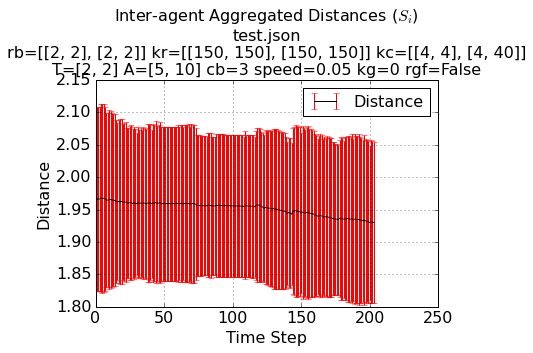

In [ ]:
%matplotlib inline
graphic()
plt.errorbar(IIMEAN.STEP,IIMEAN.DIST,IISTD.DIST,label='Distance',ecolor='red',color='black')
plt.tight_layout()
plt.title("Inter-agent Aggregated Distances ($S_i$)\n%s\nrb=%s kr=%s kc=%s\nT=%s A=%s cb=%s speed=%s kg=%s rgf=%s"%(name[0],jsonrb,jsonkr,jsonkc,jsonT,jsonA,jsoncb,jsonspeed,jsonkg,jsonrgf))
#plt.title("Inter-agent (P-P) Aggregated Distance")
plt.legend()
plt.grid()
plt.xlabel("Time Step")
plt.ylabel("Distance")
plt.show()

<H3>SWARM ANIMATION</H3>

In [23]:
%matplotlib qt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

loop = S.STEP.max()
# GET GRAPH DISPLAY LIMITS SO IT FITS NICELY
xLimMin = S.X.min() 
xLimMax = S.X.max()
yLimMin = S.Y.min()
yLimMax = S.Y.max()

graph()
fig = plt.figure()
plt.xlim(xLimMin,xLimMax)
plt.ylim(yLimMin,yLimMax)
plt.grid()
plt.gca().set_aspect("equal")
PLOT=S[["STEP","ID","X","Y"]].query("STEP==%d" % 1)
#COHESION=C[["STEP","PX","PY","NX","NY",]].query("STEP==%d" % 1)
#COHESIONP=C[["STEP","PX","PY","NX","NY","PPERIM","NPERIM"]].query("PPERIM==True and NPERIM==True and STEP==%d" % 1)
scat = plt.scatter(PLOT["X"],PLOT["Y"],s=10,color="green")
plt.title('[rb=%s cb=%s kr=%s kc=%s T=%s A=%s speed=%s]\n[kg=%s]\nTime (s): 1'%(jsonrb,jsoncb,jsonkr,jsonkc,jsonT,jsonA,jsonspeed,jsonkg))

def animate(i):
    PLOT=S[["STEP","ID","X","Y"]].query("STEP==%d" % i)
    scat.set_offsets(np.c_[PLOT["X"],PLOT["Y"]])
    plt.title('[rb=%s cb=%s kr=%s kc=%s T=%s A=%s speed=%s]\n[kg=%s]\nTime (s): %d or %d' % (jsonrb,jsoncb,jsonkr,jsonkc,jsonT,jsonA,jsonspeed,jsonkg,i+1,loop))

anim = FuncAnimation(fig, animate, interval=10, frames=loop, repeat=True)
plt.draw() 

